In [1]:
import tensorflow as tf
from numpy import unique, argmax
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

2024-05-01 09:57:31.659131: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-01 09:57:31.659458: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 09:57:31.662168: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-01 09:57:31.693741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 09:57:32.126473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

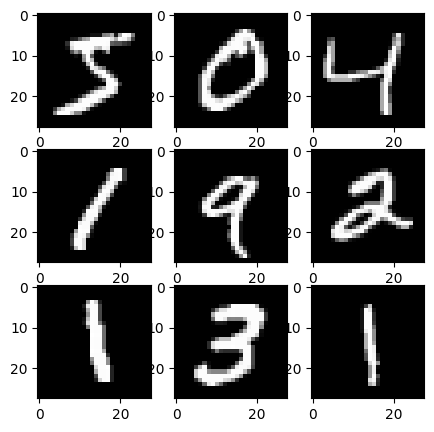

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for i in range(9):
	# define subplot
	plt.subplot(3, 3, i+1)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# Data Preprocessing

# Single channel
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

# Normalization Imgae data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# One hot encoding
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
in_shape = x_train.shape[1:]
n_classes = len(unique(y_train))

In [16]:
print(in_shape)

(28, 28, 1)


In [6]:
# Define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/home/shailesh/Desktop/VritEducation/vritvenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-01 09:57:33.263526: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-05-01 09:57:33.263543: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: shailesh-aiml
2024-05-01 09:57:33.263546: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: shailesh-aiml
2024-05-01 09:57:33.263617: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 535.171.4
2024-05-01 09:57:33.263626: I external/local_x

In [7]:
# Fit the model
hist = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7954 - loss: 0.6358 - val_accuracy: 0.9674 - val_loss: 0.1148
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9511 - loss: 0.1676 - val_accuracy: 0.9751 - val_loss: 0.0819
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9636 - loss: 0.1208 - val_accuracy: 0.9776 - val_loss: 0.0735
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9715 - loss: 0.0969 - val_accuracy: 0.9791 - val_loss: 0.0688
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9758 - loss: 0.0782 - val_accuracy: 0.9806 - val_loss: 0.0676
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9803 - loss: 0.0639 - val_accuracy: 0.9828 - val_loss: 0.0585
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9803 - loss: 0.0615 - val_accuracy: 0.9823 - val_loss: 0.0566
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9832 - loss: 0.0532 - val_accuracy: 0.

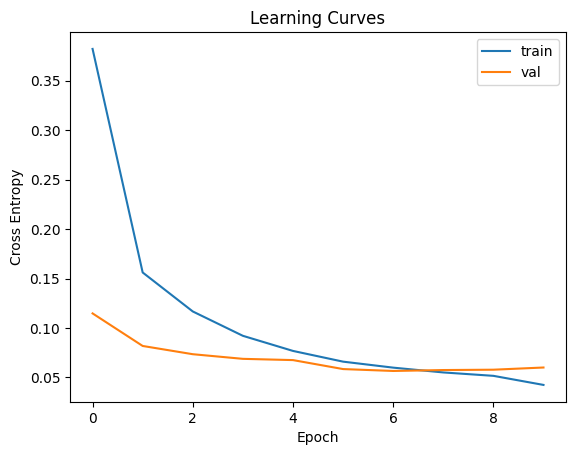

In [8]:
# Plot Learning Curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

In [9]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.9817 - loss: 0.0567


In [10]:
acc

0.9858999848365784

In [11]:
pred = argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step


In [12]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Saving the best model

In [14]:
model.save("mnist-model.keras")